In [21]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
### Loading the dataset.
dfo = pd.read_csv('vgsales.csv')
dfo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
## dfo is our original data set before cleaning.
dfo
dfo.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [15]:
### Finding out if any null values exist in the data set. We aim to delete rows with null values.
np.count_nonzero(dfo.isnull())        

329

In [16]:
### All null values are dropped to clean the dataframe. 329 rows are removed here.
dfc=dfo.dropna().reset_index()
dfc

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [17]:
### Dropping duplicate rows.Looks like no row is duplicated here.
dfc.drop_duplicates(inplace = True)
dfc

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [23]:
## Converting Year data type to integer to make our analysis easier and visualizations better.
## dfc is our final cleaned data set ready for our analysis.
dfc['Year'] = dfc['Year'].astype(int)
dfc

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [24]:
### Sales data for each Genre
df1=dfc.groupby('Genre')
df1

In [25]:
##Sales details for Racing Games
racing = df1.get_group('Racing') .reset_index()
racing

,level_0,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
1,11,11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
2,28,28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
3,42,42,43,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
4,47,47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,16217,16522,16525,Karnaaj Rally,GBA,2003,Racing,Jaleco,0.01,0.00,0.00,0.00,0.01
1221,16225,16530,16533,Sébastien Loeb Rally Evo,XOne,2016,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01
1222,16266,16573,16576,Mini Desktop Racing,Wii,2007,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
1223,16267,16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01


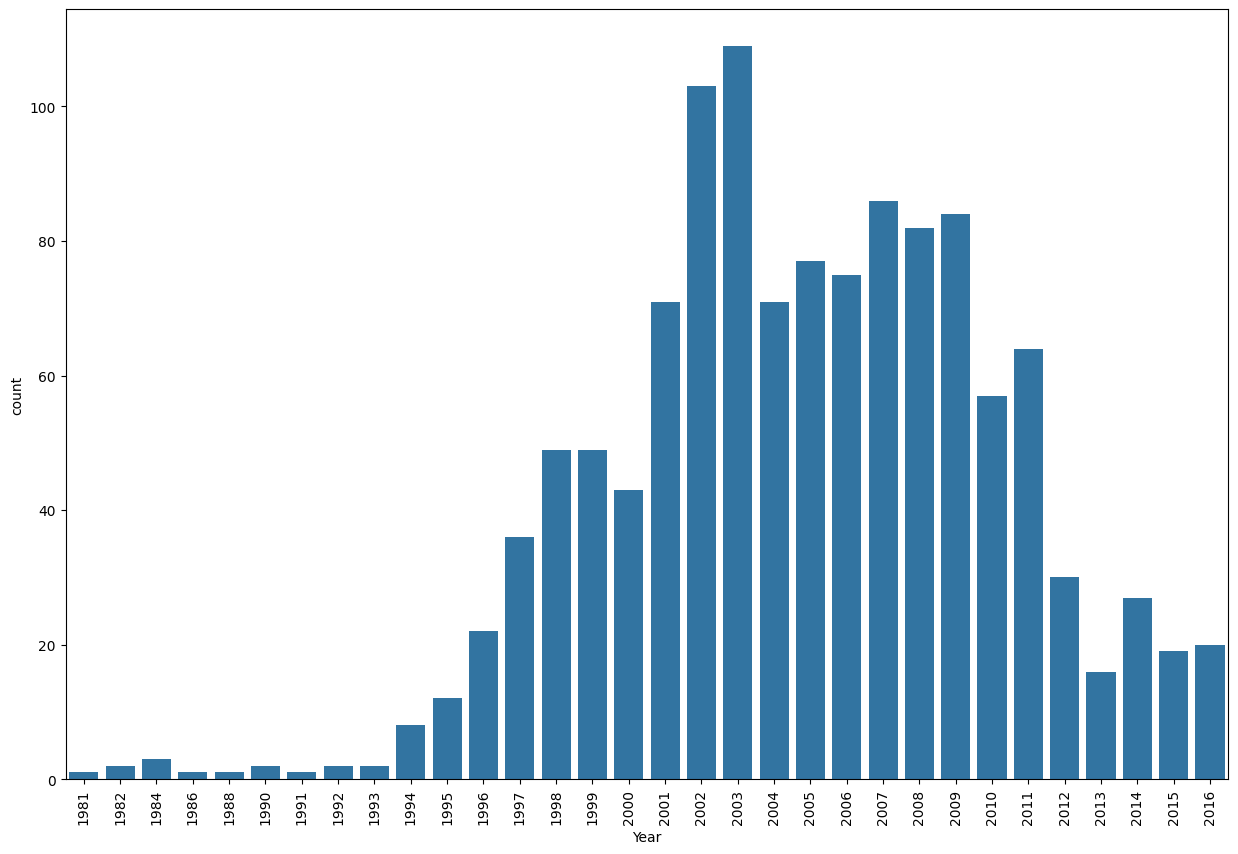

In [132]:
## Bar Plot showing Sales of Racing genre of games in each year from 1981 to 2016.

plt.figure(figsize=(15, 10))
sns.countplot(racing, x="Year")
plt.xticks(rotation=90)
plt.title= ('Count of Racing Games Sold in each Year')

In [26]:
## which Genre of games were released the most? Action was the most popular genre followed by Sports and Miscellanious games.
##Puzzle was the least popular genre.
dfc['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

In [27]:
## Which genre of games made the maximum amount of sales in Million? Action is the clear winner in terms of global sales 
##followed by Sports and Shooter in the second and third spot.
gen = dfc.groupby(by=['Genre'])['Global_Sales'].sum()
gen = gen.reset_index()
gen = gen.sort_values(by=['Global_Sales'], ascending=False)
gen                            

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76
2,Fighting,444.05
9,Simulation,389.98
5,Puzzle,242.21


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

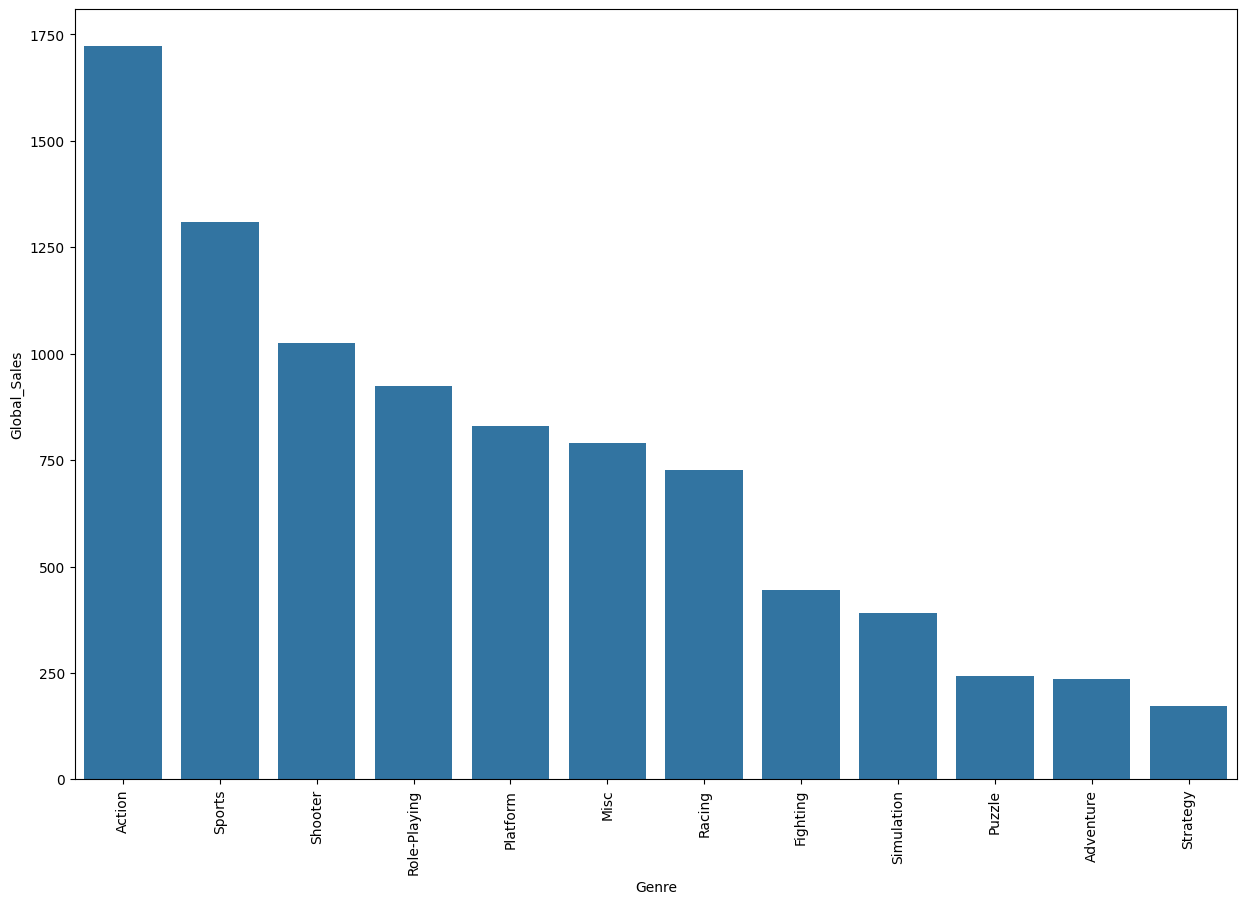

In [145]:
### Bar plot to visualize the global sales made by each genre.Srategy seems to be the least consumed genre of games.

plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=gen)
plt.xticks(rotation=90)
        

In [28]:
## Area wise sales of each Genre
dfg= dfc[['Genre','NA_Sales','EU_Sales', 'JP_Sales','Other_Sales']]
gdetails = dfg.groupby(by=['Genre']).sum()
gdetails

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.65,184.92
Adventure,101.93,63.74,51.99,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,396.92,211.77,106.67,73.92
Platform,445.99,200.65,130.65,51.51
Puzzle,122.01,50.52,56.68,12.47
Racing,356.93,236.31,56.61,76.68
Role-Playing,326.50,187.57,350.29,59.38
Shooter,575.16,310.45,38.18,101.90


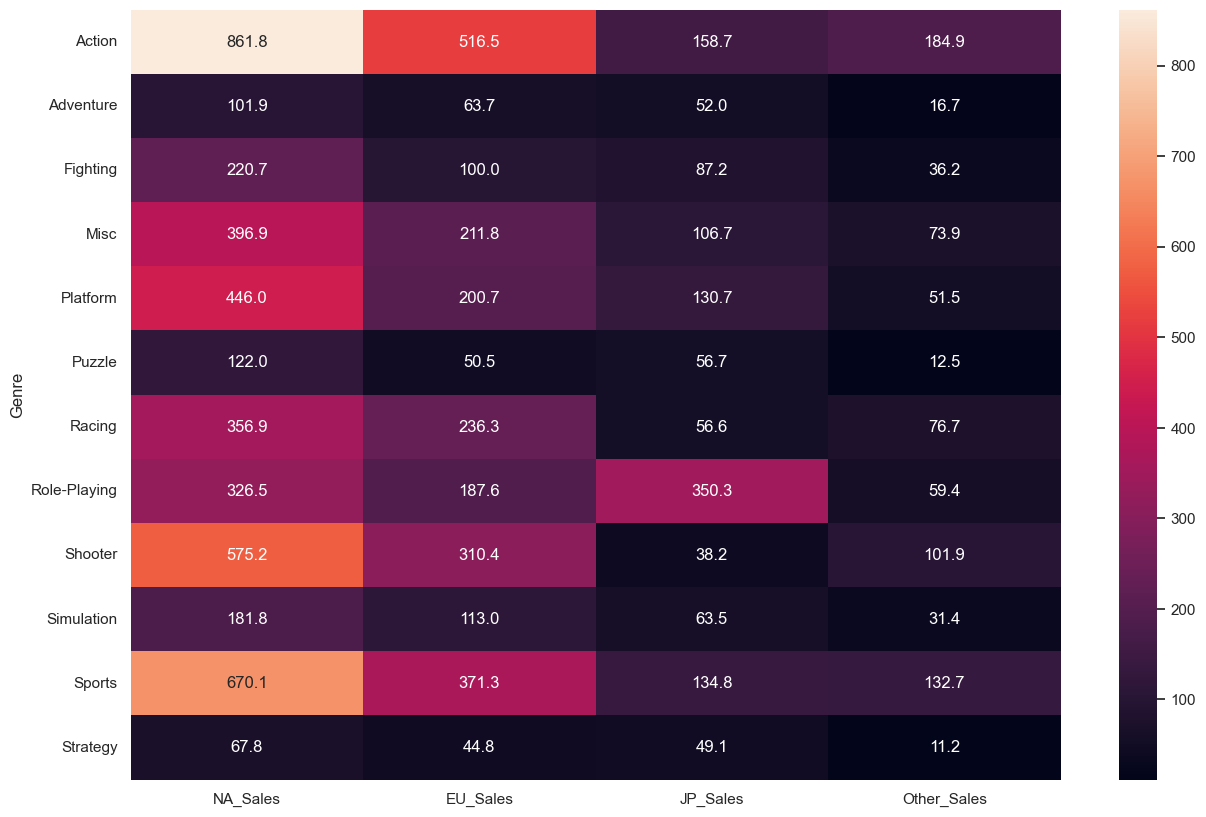

In [161]:
### Heat Map to explore sales of each genre in various areas.
plt.figure(figsize=(15, 10))
sns.heatmap(gdetails, annot=True, fmt = '.1f')
plt.show()

In [150]:
## Area wise sales of each publisher. There are 576 publishers.
dfpub= df[['Publisher','NA_Sales','EU_Sales', 'NA_Sales','Other_Sales']]
pdetails = dfpub.groupby(by=['Publisher']).sum()
pdetails

,NA_Sales,EU_Sales,NA_Sales,Other_Sales
Publisher,,,,
10TACLE Studios,0.07,0.04,0.07,0.00
1C Company,0.01,0.07,0.01,0.02
20th Century Fox Video Games,1.82,0.10,1.82,0.01
2D Boy,0.00,0.03,0.00,0.01
3DO,6.48,3.04,6.48,0.63
...,...,...,...,...
id Software,0.02,0.00,0.02,0.00
imageepoch Inc.,0.00,0.00,0.00,0.00
inXile Entertainment,0.02,0.06,0.02,0.01


In [154]:
### Total Sales by each publisher worldwide.
salesbyp = data[['Publisher', 'Global_Sales']]
salesbyp = salesbyp.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
salesbyp = pd.DataFrame(salesbyp).reset_index()
salesbyp

,Publisher,Global_Sales
0,Nintendo,151.30
1,Electronic Arts,145.77
2,Sony Computer Entertainment,110.57
3,THQ,40.17
4,Codemasters,34.62
...,...,...
123,Encore,0.02
124,Wanadoo,0.02
125,O-Games,0.02
126,Virgin Interactive,0.02


In [155]:
##Filter top 10 publishers by total sales. Nintendo,Electronic Arts and Sony Computer Entertainments emerge as the the top 3 in terms of sales.
salesbyp = salesbyp.head(10)
salesbyp

,Publisher,Global_Sales
0,Nintendo,151.30
1,Electronic Arts,145.77
2,Sony Computer Entertainment,110.57
3,THQ,40.17
4,Codemasters,34.62
5,Microsoft Game Studios,33.08
6,Sega,21.83
7,Take-Two Interactive,21.25
8,Activision,17.31
9,Ubisoft,15.83


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Sony Computer Entertainment'),
  Text(3, 0, 'THQ'),
  Text(4, 0, 'Codemasters'),
  Text(5, 0, 'Microsoft Game Studios'),
  Text(6, 0, 'Sega'),
  Text(7, 0, 'Take-Two Interactive'),
  Text(8, 0, 'Activision'),
  Text(9, 0, 'Ubisoft')])

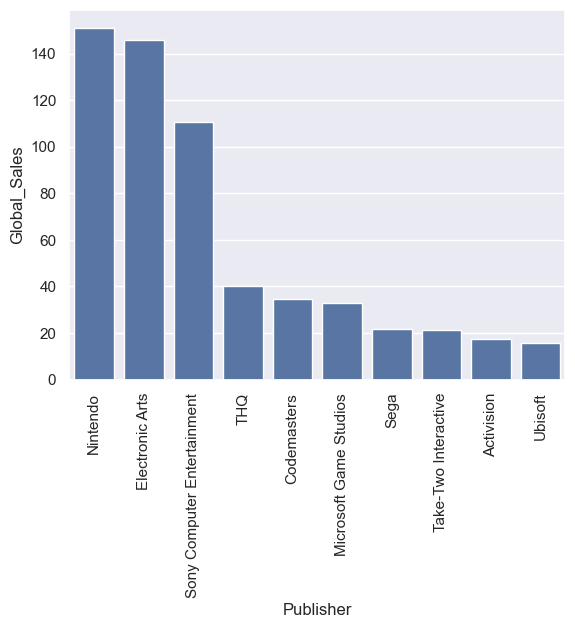

In [157]:
####Barplot showing Top 10 Publishers and the sales they made globally.
sns.barplot(x='Publisher', y='Global_Sales', data=salesbyp)
plt.xticks(rotation=90)

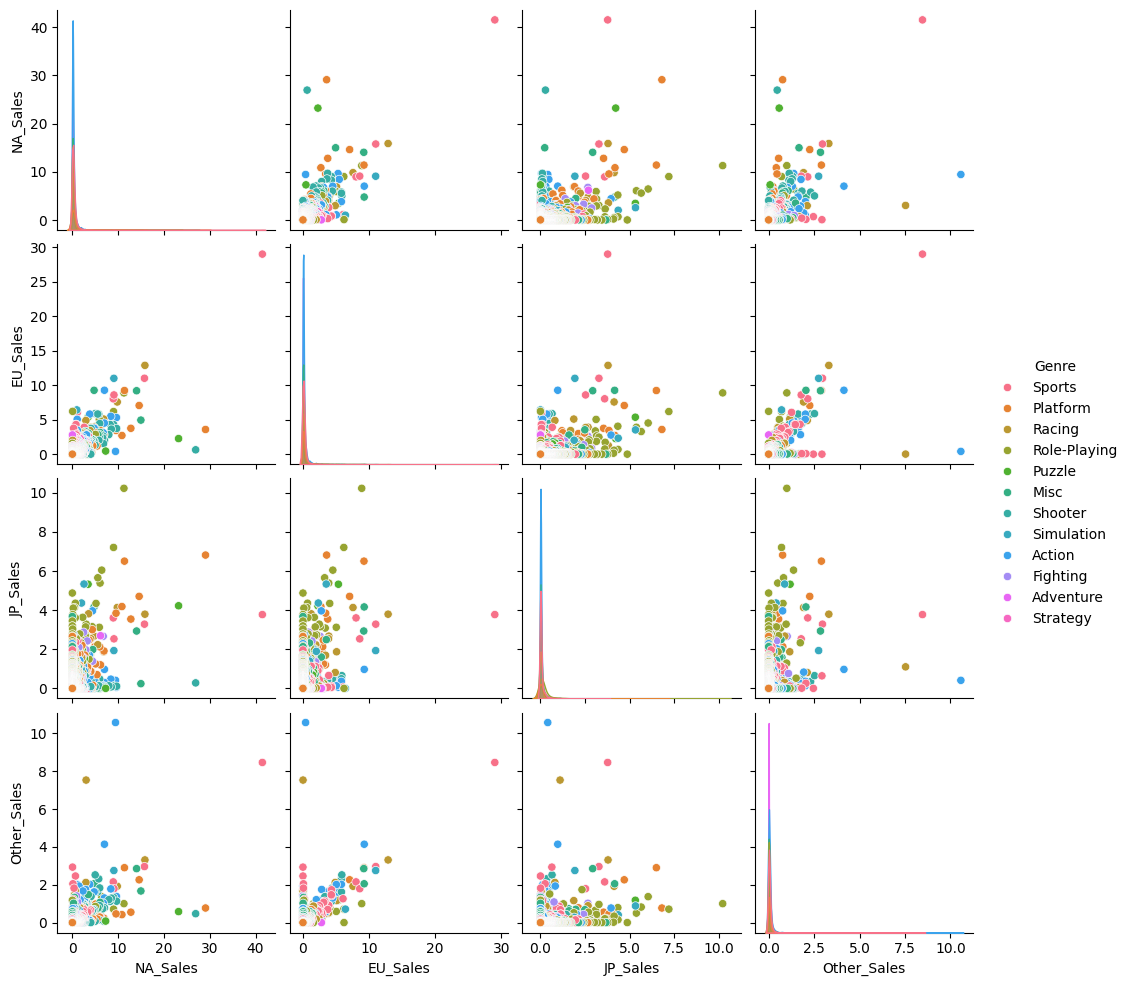

In [34]:
### Pair Plot of each genre by regional Sales showing their corelation.
pairdetails = dfc.loc[:,[ "Genre", "NA_Sales","EU_Sales", "JP_Sales","Other_Sales"]]
sns.pairplot(pairdetails, hue='Genre')

### Summary of the data analysis:
    North America seems to be the top market with the highest total sales of video games both by count and sales value.
Action,Sports and shooter are the top selling genres of games. Nintendo,Electronic Arts and Sony Computer Entertainment are the publishers with 
highest global sales. In North America,Europe and other countries Action is the top selling genre of games while Japaneese gamers seem to 
love 'role-play' games the most. The top 3 publishers cash in  more than 50 percent of global sales in games. Other publishers has a huge 
market to tap in.